# Introduction
The dataset we'll use describes Euro daily exchange rates between 1999 and 2021. The euro (symbolized with €) is the official currency in most of the countries of the European Union.

If the exchange rate of the euro to the US dollar is 1.5, you get 1.5 US dollars if you pay 1.0 euro (one euro has more value than one US dollar at this exchange rate).

In this notebook we are going to study the history of the Euro vs US Dollar.

# Gather
Daria Chemkaeva put together the data set and made it available on [Kaggle](https://www.kaggle.com/lsind18/euro-exchange-daily-rates-19992020) — the data source is the European Central Bank. Note that the dataset gets regular updates — we downloaded it on January 2021.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from celluloid import Camera
from IPython.display import Image
%matplotlib inline

In [2]:
df = pd.read_csv('euro-daily-hist_1999_2020.csv')

In [3]:
df.head()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2021-01-08,1.5758,1.9558,6.5748,1.5543,1.0827,7.9184,NaN,26.163,7.4369,...,4.8708,90.8000,10.0510,1.6228,NaN,NaN,36.8480,9.0146,1.2250,18.7212
1,2021-01-07,1.5836,1.9558,6.5172,1.5601,1.0833,7.9392,NaN,26.147,7.4392,...,4.8712,91.2000,10.0575,1.6253,NaN,NaN,36.8590,8.9987,1.2276,18.7919
2,2021-01-06,1.5824,1.9558,6.5119,1.5640,1.0821,7.9653,NaN,26.145,7.4393,...,4.8720,90.8175,10.0653,1.6246,NaN,NaN,36.9210,9.0554,1.2338,18.5123
3,2021-01-05,1.5927,1.9558,6.5517,1.5651,1.0803,7.9315,NaN,26.227,7.4387,...,4.8721,91.6715,10.0570,1.6180,NaN,NaN,36.7760,9.0694,1.2271,18.4194
4,2021-01-04,1.5928,1.9558,6.3241,1.5621,1.0811,7.9484,NaN,26.141,7.4379,...,4.8713,90.3420,10.0895,1.6198,NaN,NaN,36.7280,9.0579,1.2296,17.9214


In [4]:
df.tail()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
5694,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855
5695,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
5696,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
5697,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975
5698,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,...,1.3111,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,1.1789,6.9358


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5699 non-null   object 
 1   [Australian dollar ]      5699 non-null   object 
 2   [Bulgarian lev ]          5297 non-null   object 
 3   [Brazilian real ]         5431 non-null   object 
 4   [Canadian dollar ]        5699 non-null   object 
 5   [Swiss franc ]            5699 non-null   object 
 6   [Chinese yuan renminbi ]  5431 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           5699 non-null   object 
 9   [Danish krone ]           5699 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      5699 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       5699 non-null   object 
 14  [Croatia

# Clean
Below, we do the following:

* We rename the `[US dollar ]` and `Period\Unit:` columns to something easier to type — us_dollar and time.
* We change the time column to a datetime data type.
* We sort the values by time in ascending order.
* We reset the index (and drop the initial index).
* Isolate `time` & `us_dollar` in a separate df since this is our area of focus.
* Drop rows with `us_dollar` value = `-`
* Convert the `us_dollar` column to a float data type.

## Columns renaming
### <span style='color:#6d6d6d'>Cleaning code</span>

In [6]:
df.rename(columns={'[US dollar ]':'us_dollar', 'Period\\Unit:':'time'}, inplace=True)

### <span style='color:#6d6d6d'>Test</span>

In [7]:
df[['time','us_dollar']].sample()

,time,us_dollar
5427,2000-01-18,1.0093


## Change the time column to a datetime data type
### <span style='color:#6d6d6d'>Cleaning code</span>

In [8]:
df['time'] = pd.to_datetime(df.time)

### <span style=color:#6d6d6d>Test</span>

In [9]:
df.time.dtype

dtype('<M8[ns]')

## Sort the values by time in ascending order & reset index.
### <span style='color:#6d6d6d'>Cleaning code</style>

In [10]:
df = df.sort_values('time').reset_index(drop=True)

### <span style='color:#6d6d6d'>Test</style>

In [11]:
df.head()

,time,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],us_dollar,[South African rand ]
0,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,...,1.3111,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,1.1789,6.9358
1,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975
2,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
3,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
4,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855


## Isolate `time` & `us_dollar` in a separate df
### <span style='color:#6d6d6d'>Cleaning code</style>

In [12]:
usd_df = df[['time','us_dollar']].copy()

### <span style='color:#6d6d6d'>Test</style>

In [13]:
usd_df.sample()

,time,us_dollar
260,2000-01-03,1.0090


In [14]:
usd_df.us_dollar.value_counts()

-         62
1.2276     9
1.1215     8
1.1305     7
1.0867     6
          ..
0.8411     1
1.2158     1
1.5599     1
0.9243     1
1.1227     1
Name: us_dollar, Length: 3528, dtype: int64

## Drop rows with `us_dollar` value = `-`
### <span style='color:#6d6d6d'>Cleaning code</style>

In [15]:
usd_df.drop(index=usd_df[usd_df['us_dollar']=='-'].index, inplace=True)

### <span style='color:#6d6d6d'>Test</style>

In [16]:
usd_df.us_dollar.value_counts()

1.2276    9
1.1215    8
1.1305    7
1.0867    6
1.3373    6
         ..
1.2158    1
1.5599    1
0.9243    1
1.1625    1
1.1227    1
Name: us_dollar, Length: 3527, dtype: int64

## Convert the `us_dollar` column to a float data type.
### <span style='color:#6d6d6d'>Cleaning code</style>

In [17]:
usd_df.us_dollar = usd_df.us_dollar.astype('float')

### <span style='color:#6d6d6d'>Test</style>

In [18]:
usd_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5637 entries, 0 to 5698
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   time       5637 non-null   datetime64[ns]
 1   us_dollar  5637 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 132.1 KB


---
# Analysis
Now that we're finished cleaning the data, we'll generate a line plot to visualize the evolution of the euro-dollar exchange rate.

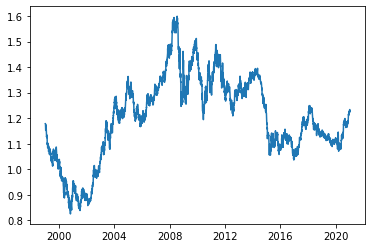

In [19]:
fig, ax = plt.subplots()
ax.plot(usd_df.time, usd_df.us_dollar)

The resulting figure has many wiggles representing the daily variation of the exchange rate. However, we are only interested in long term variation so next we are going to apply rolling mean with rolling window of 30 days showing variation of exchange rate every 30 days.

In [20]:
usd_df['rolling_mean_30'] = usd_df.us_dollar.rolling(30).mean()

In [21]:
usd_df.tail()

,time,us_dollar,rolling_mean_30
5694,2021-01-04,1.2296,1.211170
5695,2021-01-05,1.2271,1.212530
5696,2021-01-06,1.2338,1.213987
5697,2021-01-07,1.2276,1.215357
5698,2021-01-08,1.2250,1.216557


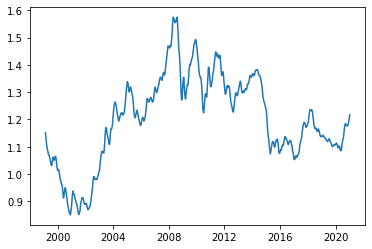

In [22]:
fig, ax = plt.subplots()
ax.plot(usd_df.time, usd_df.rolling_mean_30)

# Study of history
Now it's time to study the history of the Euro vs US Dollar using our generated plot, there are 7 interesting highlights in the history of the Euro let's take a look at them:
* 1- The currency was introduced in non-physical form (traveller's cheques, electronic transfers, banking, etc.) at midnight on 1 January 1999 [[source]](https://en.wikipedia.org/wiki/History_of_the_euro#Launch)
* 2- Transition from national legacy currencies to euro 2002 [[source]](https://en.wikipedia.org/wiki/History_of_the_euro#Aftermath)
* 3- Global financial crisis 2008 [[source]](https://en.wikipedia.org/wiki/History_of_the_euro#Recession_era)
* 4- Greek Crisis 2010 [[source]](https://www.thebalance.com/what-is-the-greece-debt-crisis-3305525#:~:text=Why%20Greece%20Didn't%20Leave%20the%20Eurozone&text=Without%20the%20austerity%20measures%2C%20the,lowered%20its%20euro%20exchange%20rate.)
* 5- Euro plunging for many reasons Much of has been about the strength of the Dollar 2014. [[source]](https://money.cnn.com/2015/01/05/investing/euro-slump-deepens/index.html)
* 6- Quantitative Easing start in Europe 2015 [[source]](https://www.reuters.com/article/us-eurozone-ecb-qe-idUSKBN1OB1SM)
* 7- Coronavirus Pandemic 2020 [[source]](https://www.statista.com/statistics/1102209/coronavirus-cases-development-europe/)

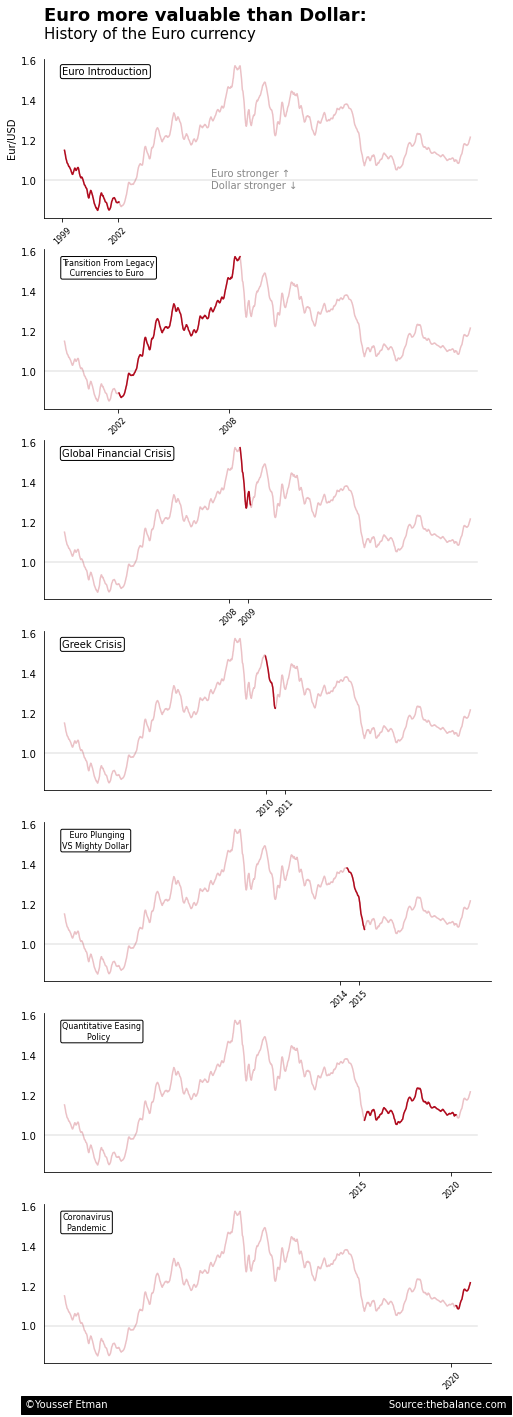

In [23]:
fig , axs = plt.subplots(7,1,figsize=(8,24))

for ax in axs:
    ax.plot(usd_df.time, usd_df.rolling_mean_30, color='#b00b1e', alpha=0.25)
    ax.axhline(y=1, color='#898989', alpha=0.2, xmax=0.97)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.tick_params(left=False)

# Euro introduction
axs[0].plot(usd_df.time[0:782], usd_df.rolling_mean_30[0:782], color='#b00b1e')
axs[0].set_xticks([datetime.strptime('1999', '%Y'), datetime.strptime('2002', '%Y')])
axs[0].set_xticklabels(['1999', '2002'], rotation=45, size=8)
axs[0].text(x=datetime.strptime('1999', '%Y'), y=1.53, s='Euro Introduction', bbox=dict(facecolor='none', 
                                                                                        edgecolor='black', 
                                                                                        boxstyle='round,pad=0.2'))
axs[0].set_ylabel('Eur/USD')
axs[0].text(x=datetime.strptime('2007', '%Y'), y=1.02, s='Euro stronger ↑', color='#898989')
axs[0].text(x=datetime.strptime('2007', '%Y'), y=0.96, s='Dollar stronger ↓', color='#898989')

# Transition from legacy currencies to Euro
axs[1].plot(usd_df.time[782:2455], usd_df.rolling_mean_30[782:2455], color='#b00b1e')
axs[1].set_xticks([datetime.strptime('2002', '%Y'), datetime.strptime('2008', '%Y')])
axs[1].set_xticklabels(['2002', '2008'], rotation=45, size=8)
axs[1].text(x=datetime.strptime('1999', '%Y'), y=1.48, s='Transition From Legacy\n   Currencies to Euro', size=8, bbox=dict(facecolor='none', 
                                                                                        edgecolor='black', 
                                                                                        boxstyle='round,pad=0.2'))

# Great Depression
axs[2].plot(usd_df.time[2455:2600], usd_df.rolling_mean_30[2455:2600], color='#b00b1e')
axs[2].set_xticks([datetime.strptime('2008', '%Y'), datetime.strptime('2009', '%Y')])
axs[2].set_xticklabels(['2008', '2009'], rotation=45, size=8)
axs[2].text(x=datetime.strptime('1999', '%Y'), y=1.53, s='Global Financial Crisis', bbox=dict(facecolor='none', 
                                                                                        edgecolor='black', 
                                                                                        boxstyle='round,pad=0.2'))

# Greek Crisis
axs[3].plot(usd_df.time[2807:2940], usd_df.rolling_mean_30[2807:2940], color='#b00b1e')
axs[3].set_xticks([datetime.strptime('2010', '%Y'), datetime.strptime('2011', '%Y')])
axs[3].set_xticklabels(['2010', '2011'], rotation=45, size=8)
axs[3].text(x=datetime.strptime('1999', '%Y'), y=1.53, s='Greek Crisis', bbox=dict(facecolor='none', 
                                                                                        edgecolor='black', 
                                                                                        boxstyle='round,pad=0.2'))

# Euro plunging vs mighty dollar
axs[4].plot(usd_df.time[3935:4175], usd_df.rolling_mean_30[3935:4175], color='#b00b1e')
axs[4].set_xticks([datetime.strptime('2014', '%Y'), datetime.strptime('2015', '%Y')])
axs[4].set_xticklabels(['2014', '2015'], rotation=45, size=8)
axs[4].text(x=datetime.strptime('1999', '%Y'), y=1.48, s='   Euro Plunging\nVS Mighty Dollar', size=8, bbox=dict(facecolor='none', 
                                                                                        edgecolor='black', 
                                                                                        boxstyle='round,pad=0.2'))

# Quantitative Easing commences
axs[5].plot(usd_df.time[4175:5440], usd_df.rolling_mean_30[4175:5440], color='#b00b1e')
axs[5].set_xticks([datetime.strptime('2015', '%Y'), datetime.strptime('2020', '%Y')])
axs[5].set_xticklabels(['2015', '2020'], rotation=45, size=8)
axs[5].text(x=datetime.strptime('1999', '%Y'), y=1.48, s='Quantitative Easing\n          Policy', size=8, bbox=dict(facecolor='none', 
                                                                                        edgecolor='black', 
                                                                                        boxstyle='round,pad=0.2'))

# Coronavirus Pandemic
axs[6].plot(usd_df.time[5440:], usd_df.rolling_mean_30[5440:], color='#b00b1e')
axs[6].set_xticks([datetime.strptime('2020', '%Y')])
axs[6].set_xticklabels(['2020'], rotation=45, size=8)
axs[6].text(x=datetime.strptime('1999', '%Y'), y=1.48, s='Coronavirus\n  Pandemic', size=8, bbox=dict(facecolor='none', 
                                                                                        edgecolor='black', 
                                                                                        boxstyle='round,pad=0.2'))

# Title & subtitle
axs[0].text(x=datetime.strptime('1998', '%Y'), y=1.8, s='Euro more valuable than Dollar:', weight='bold', size=18)
axs[0].text(x=datetime.strptime('1998', '%Y'), y=1.71, s='History of the Euro currency', size=15)

# Signature
axs[6].text(x=datetime.strptime('1997', '%Y'), y=0.59, s='©Youssef Etman'+' '*90+'Source:thebalance.com',
            backgroundcolor='#000000', color='#ffffff');

The figure above is too long and might be annoying for some readers, Next we are going to generate an animated GIF that summarizes all of the above figures.

In [25]:
fig1, (ax1, ax2) = plt.subplots(1,2, figsize=(14,4))
camera = Camera(fig1)
starts=[0, 782, 2455, 2807, 3935, 4175, 5440]
ends =[782, 2455, 2600, 2940, 4175, 5440, -1]
wys = [1.53, 1.48, 1.53, 1.53, 1.48, 1.48, 1.48]
texts = ['Euro Introduction', 'Transition From Legacy\n   Currencies to Euro', 'Global Financial Crisis',
       'Greek Crisis', '   Euro Plunging\nVS Mighty Dollar', 'Quantitative Easing\n          Policy',
       'Coronavirus\n  Pandemic']
sizes=[10, 8, 10, 10, 8, 8, 8]

for start, end, wy, text, size in zip(starts, ends, wys, texts, sizes):
    for i in range(0,5):
        # Main figure
        ax1.plot(usd_df.time, usd_df.rolling_mean_30, color='#b00b1e')
        ax1.axhline(y=1, color='#898989', alpha=0.4, xmax=0.97)
        ax1.text(x=datetime.strptime('2007', '%Y'), y=1.02, s='Euro stronger ↑', color='#898989')
        ax1.text(x=datetime.strptime('2007', '%Y'), y=0.96, s='Dollar stronger ↓', color='#898989')
        ax1.spines['right'].set_visible(False)
        ax1.spines['top'].set_visible(False)
        ax1.tick_params(left=False)
        ax1.set_ylabel('Eur / USD')
    
        ax2.plot(usd_df.time, usd_df.rolling_mean_30, color='#b00b1e', alpha=0.25)
        ax2.axhline(y=1, color='#898989', alpha=0.2, xmax=0.97)
        ax2.spines['right'].set_visible(False)
        ax2.spines['top'].set_visible(False)
        ax2.tick_params(left=False)
        
        # Title
        ax1.text(x=datetime.strptime('1998', '%Y'), y=1.65, s='History of the Euro currency', size=15)
        
        # Signature
        ax1.text(x=datetime.strptime('1997', '%Y'), y=0.7, s='©Youssef Etman'+' '*195+'Source:thebalance.com',
        backgroundcolor='#000000', color='#ffffff')

        # Dynamic figure
        ax2.plot(usd_df.time[start:end], usd_df.rolling_mean_30[start:end], color='#b00b1e')
        ax2.text(x=datetime.strptime('1999', '%Y'), y=wy, s=text, size=size, bbox=dict(facecolor='none', 
                                                                                        edgecolor='black', 
                                                                                        boxstyle='round,pad=0.2'))
        camera.snap()
    
# Compile & save animation
animation = camera.animate()
animation.save('euro_hist.gif')

# Clear figure
plt.clf()

# Uncomment the following line if you are running this notebook locally to load the saved GIF
# Image(url='euro_hist.gif')

# This line is to load the GIF that I created and hosted on imgur in order to render the GIF online
# You can comment the following line if you are running this notebook locally
Image(url='https://i.imgur.com/lDiohw3.gif')

MovieWriter ffmpeg unavailable; using Pillow instead.


<Figure size 1008x288 with 0 Axes>